In [63]:
import pandas as pd
import re
from rouge_score import rouge_scorer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_excel('commit-messages-eval.xlsx')

model_msgs = df['model'].astype(str)
human_msgs_concise = df['human - concise'].astype(str)
human_msgs_extended = df['human - extended'].astype(str)

#clean up model messages as they all start with programming language and unnecessary info.
df['model'] = df['model'].apply(lambda x: re.sub(r'^.*?:\s*', '', str(x)))

In [65]:
# Initialize scorer with ROUGE-1, ROUGE-2, and ROUGE-L
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

rouge1_concise_scores = []
# rouge2_concise_scores = []
rougeL_concise_scores = []

rouge1_extended_scores = []
# rouge2_extended_scores = []
rougeL_extended_scores = []

for model, human in zip(model_msgs, human_msgs_concise):
    scores = scorer.score(human, model)
    rouge1_concise_scores.append(scores['rouge1'].fmeasure)
    # rouge2_concise_scores.append(scores['rouge2'].fmeasure)
    rougeL_concise_scores.append(scores['rougeL'].fmeasure)

for model, human in zip(model_msgs, human_msgs_extended):
    scores = scorer.score(human, model)
    rouge1_extended_scores.append(scores['rouge1'].fmeasure)
    # rouge2_extended_scores.append(scores['rouge2'].fmeasure)
    rougeL_extended_scores.append(scores['rougeL'].fmeasure)

print(f"Average concise ROUGE-1 F1: {np.mean(rouge1_concise_scores):.4f}")
# print(f"Average concise ROUGE-2 F1: {np.mean(rouge2_concise_scores):.4f}")
print(f"Average concise ROUGE-L F1: {np.mean(rougeL_concise_scores):.4f}")

print(f"Average extended ROUGE-1 F1: {np.mean(rouge1_extended_scores):.4f}")
# print(f"Average extended ROUGE-2 F1: {np.mean(rouge2_extended_scores):.4f}")
print(f"Average extended ROUGE-L F1: {np.mean(rougeL_extended_scores):.4f}")

Average concise ROUGE-1 F1: 0.1894
Average concise ROUGE-L F1: 0.1758
Average extended ROUGE-1 F1: 0.1928
Average extended ROUGE-L F1: 0.1572


In [66]:
df['concise msg ROUGE-1'] = rouge1_concise_scores
# df['concise msg ROUGE-2'] = rouge2_concise_scores
df['concise msg ROUGE-L'] = rougeL_concise_scores

df['extended msg ROUGE-1'] = rouge1_extended_scores
# df['extended msg ROUGE-2'] = rouge2_extended_scores
df['extended msg ROUGE-L'] = rougeL_extended_scores
# Save to Excel or CSV
df.to_excel('commit_message_rouge_scores.xlsx', index=False)


In [31]:

# model_names = ['Model 1', 'Model 2', 'Model 3']  # Replace with your model names

# # X-axis positions for the models

# # Create a plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Plotting ROUGE-1, ROUGE-2, and ROUGE-L scores
# ax.bar(x - 0.2, rouge1_concise_scores, 0.2, label='ROUGE-1', color='blue')
# ax.bar(x, rouge2_concise_scores, 0.2, label='ROUGE-2', color='green')
# ax.bar(x + 0.2, rougeL_concise_scores, 0.2, label='ROUGE-L', color='orange')

# # Adding labels and title
# ax.set_xlabel('Models')
# ax.set_ylabel('Scores')
# ax.set_title('Comparison of ROUGE Scores by Model')
# ax.set_xticks(x)
# ax.set_xticklabels(model_names)
# ax.legend()

# # Show the plot
# plt.tight_layout()
# plt.show()


In [67]:
# df['test_type'] = df['test_name'].str.extract(r'^(bug_fix|doc_update|feature_addition|refactor)')
# java_tests = df[df['test_language']=='java'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
# python_tests = df[df['test_language']=='python'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
# javascript_tests = df[df['test_language']=='javascript'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]

df['test_type'] = df['test_name'].str.extract(r'^(bug_fix|doc_update|feature_addition|refactor)')
java_tests = df[df['test_language']=='java'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
python_tests = df[df['test_language']=='python'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]
javascript_tests = df[df['test_language']=='javascript'].loc[:, ~df.columns.isin(['human - concise', 'human - extended', 'model'])]

In [68]:
df.sample(9)

,test_name,test_language,human - concise,human - extended,model,concise msg ROUGE-1,concise msg ROUGE-L,extended msg ROUGE-1,extended msg ROUGE-L,test_type
13,refactor_1,java,refactor: simplify isEven method,refactor: Refactor the isEven method to return...,"""Removed unnecessary return statements and add...",0.111111,0.111111,0.285714,0.190476,refactor
46,feature_addition_3,python,feat: add timestamp and read status to Notific...,feat: Enhance the Notification class by introd...,"""Added end() and end_at attributes and methods""",0.090909,0.090909,0.078431,0.078431,feature_addition
6,doc_update_2,java,docs: add Javadoc for area method,docs: Include a Javadoc comment for the area m...,Added function to calculate the area of a circle.,0.200000,0.200000,0.444444,0.222222,doc_update
17,refactor_5,java,refactor: extract login handling into smaller ...,refactor: extract login handling into smaller ...,[REMOVED] Removed unnecessary if statement and...,0.083333,0.083333,0.072727,0.072727,refactor
15,refactor_3,java,refactor: extract admin check into a separate ...,refactor: Refactor the authentication logic by...,"""Added isAdmin function and removed unnecessar...",0.100000,0.100000,0.088889,0.088889,refactor
42,doc_update_2,python,docs: add Javadoc for area method,docs: Include a Javadoc comment for the area m...,"""Added function to calculate the area of a cir...",0.200000,0.200000,0.444444,0.222222,doc_update
1,bug_fix_2,java,fix: handle empty array and cast to double for...,fix: modify average method to handle empty arr...,"""Removed unnecessary conversion to double""",0.272727,0.272727,0.133333,0.133333,bug_fix
35,refactor_5,javascript,refactor: extract login handling into smaller ...,refactor: extract login handling into smaller ...,"""Added functions for password validation and l...",0.363636,0.272727,0.264151,0.188679,refactor
44,feature_addition_1,python,feat: add farewell method to Utils class,feat: Introduce a new farewell method to the U...,"""Added farewell function""",0.133333,0.133333,0.121212,0.121212,feature_addition


In [8]:
java_tests.head()
# python_tests['test_language'].iloc[0]
# javascript_tests['test_language'].iloc[0]

,test_name,test_language,concise msg ROUGE-1,concise msg ROUGE-L,extended msg ROUGE-1,extended msg ROUGE-L,test_type
0,bug_fix_1,java,0.300000,0.200000,0.212766,0.212766,bug_fix
1,bug_fix_2,java,0.272727,0.272727,0.133333,0.133333,bug_fix
2,bug_fix_3,java,0.454545,0.454545,0.322581,0.258065,bug_fix
3,bug_fix_4,java,0.166667,0.166667,0.260870,0.260870,bug_fix
4,bug_fix_5,java,0.173913,0.173913,0.111111,0.111111,bug_fix


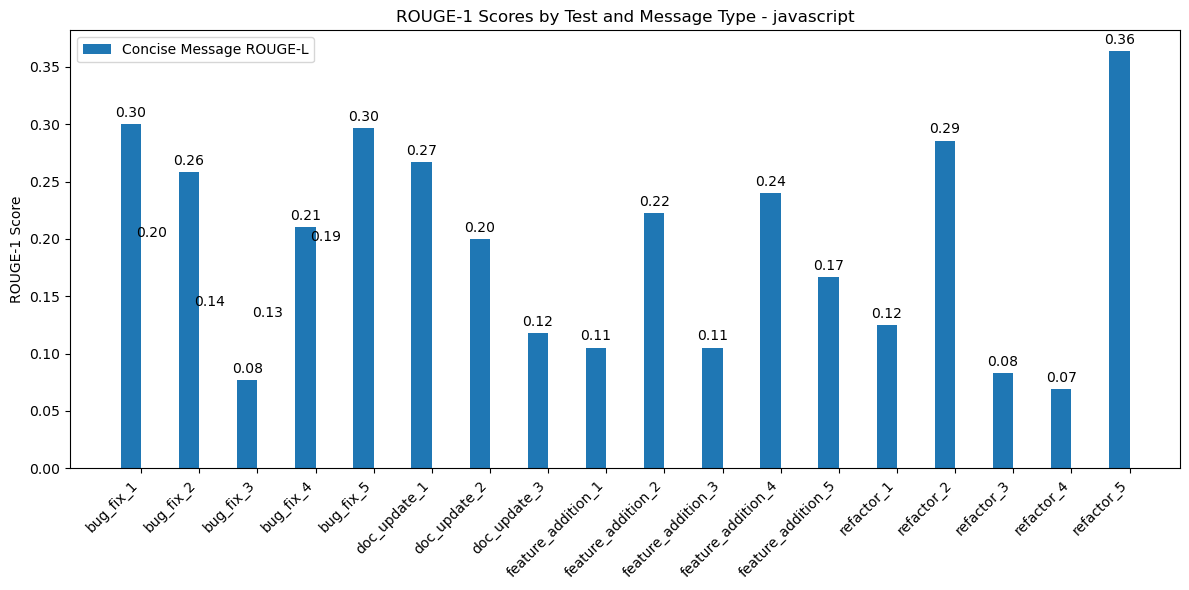

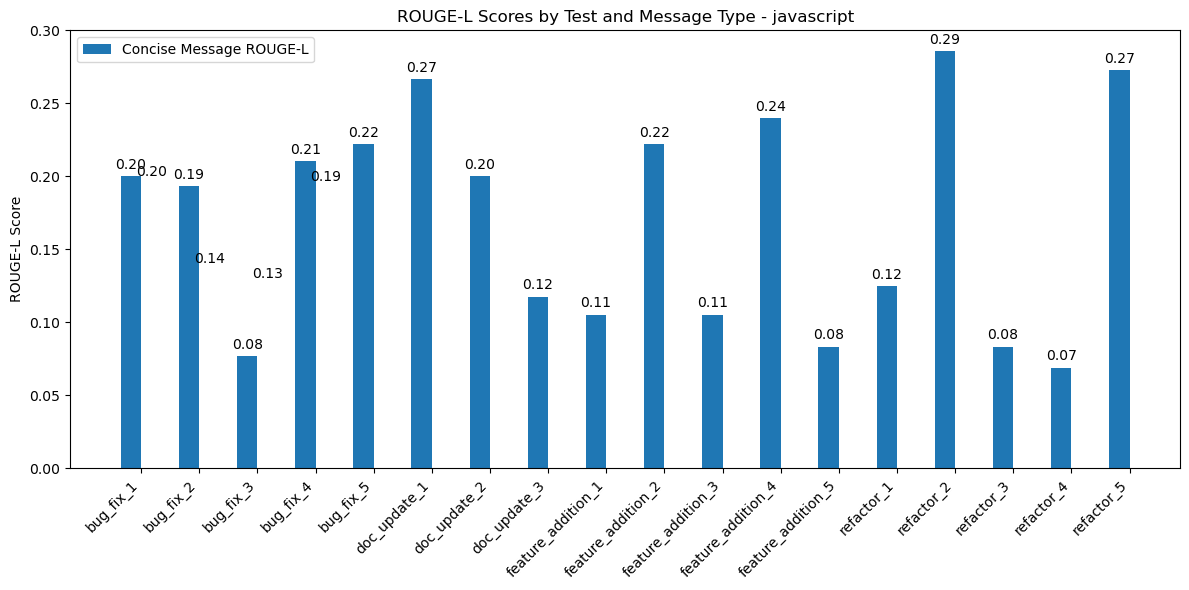

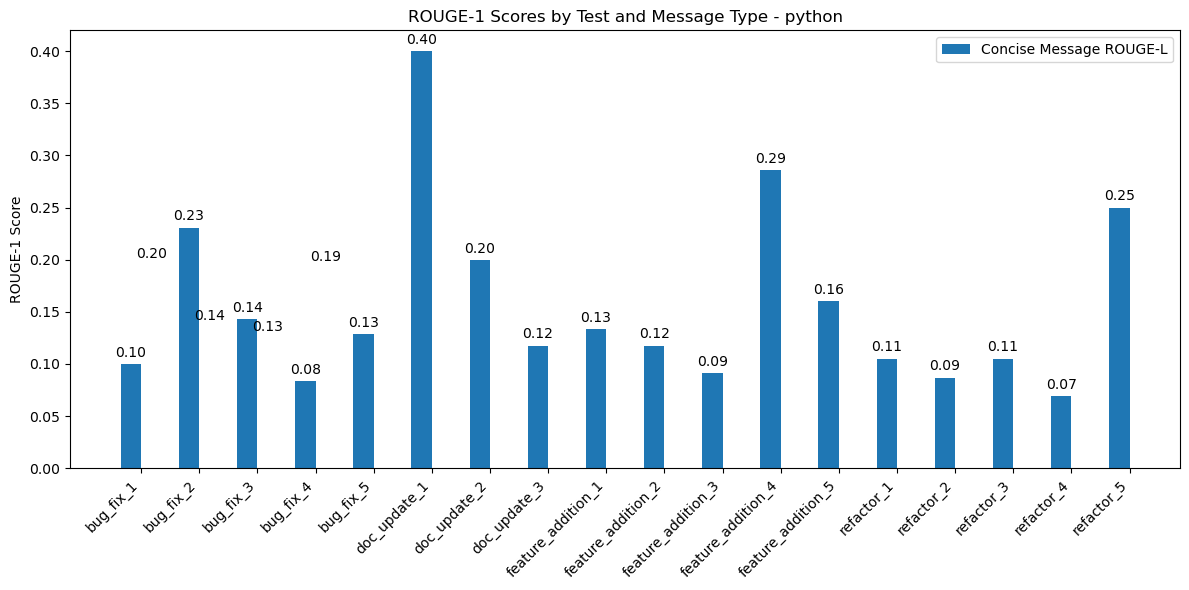

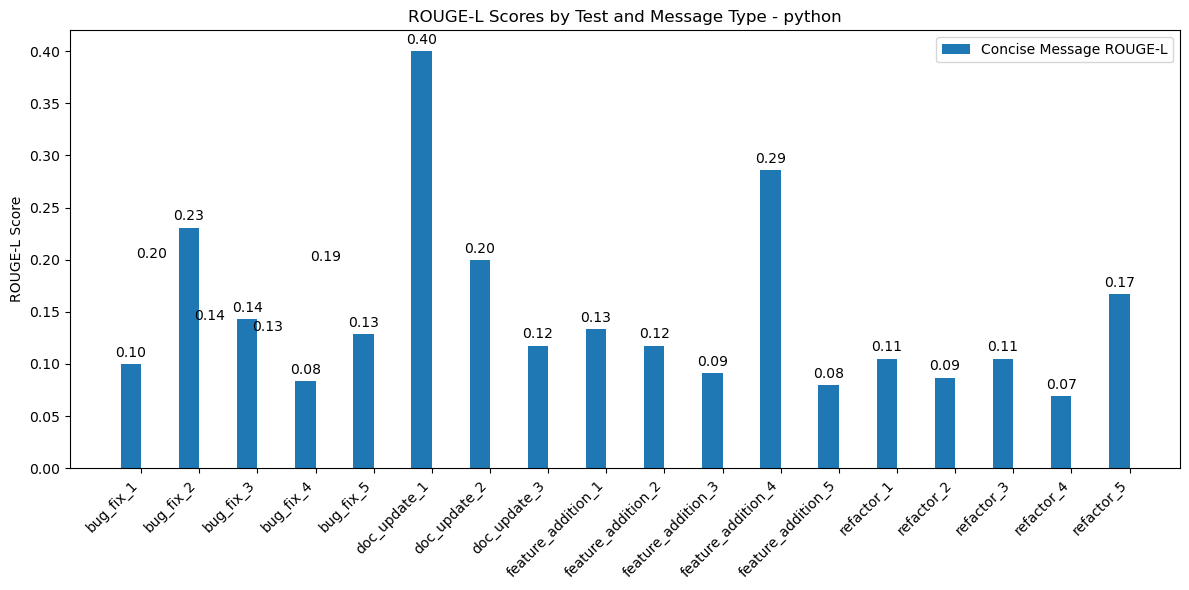

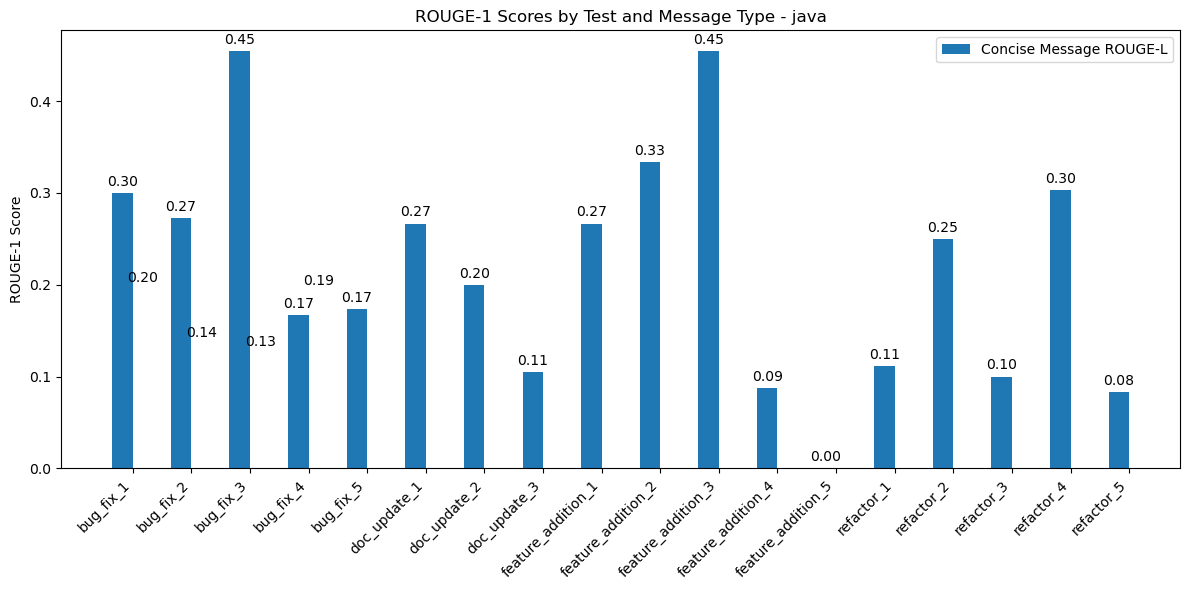

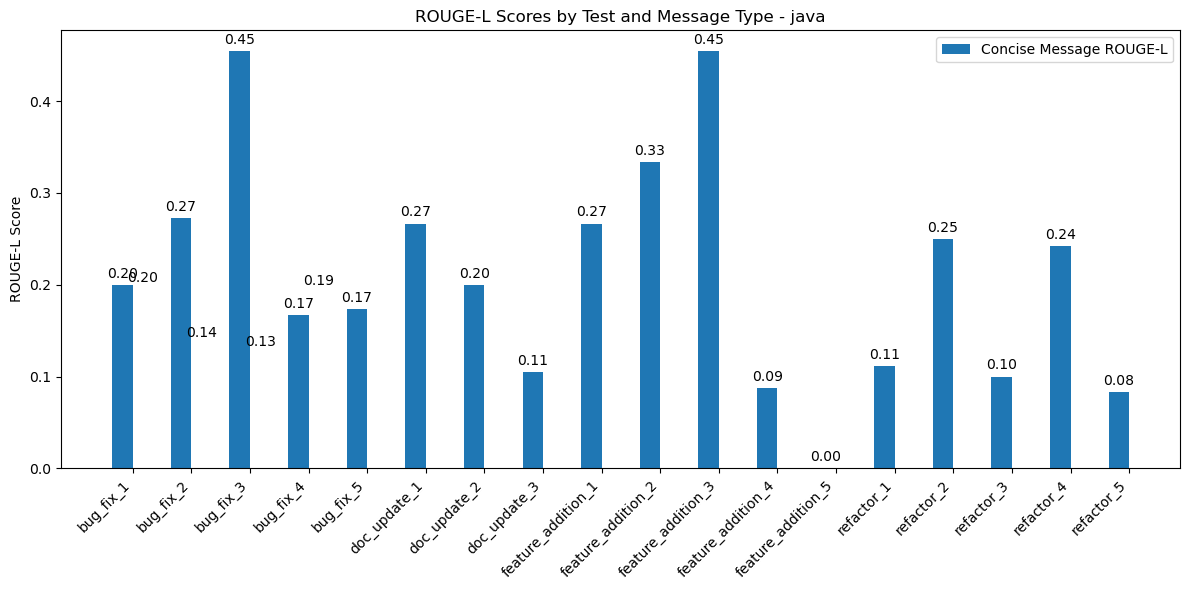

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    for df in [javascript_tests, python_tests, java_tests]:
        for test in ['ROUGE-1', 'ROUGE-L']:
            # Shorten column names for ease
            # df = df.rename(columns={
            #     "concise msg ROUGE-L": "concise",
            #     "extended msg ROUGE-L": "extended"
            # })
            
            # Set up for plotting
            x = np.arange(len(df["test_name"]))  # label locations
            width = 0.35  # width of the bars
            
            fig, ax = plt.subplots(figsize=(12, 6))
            
            # Plot bars
            bars1 = ax.bar(x - width/2, df[f"concise msg {test}"], width, label='Concise Message ROUGE-L')
            # bars2 = ax.bar(x + width/2, df[f"extended msg {test}"], width, label='Extended Message ROUGE-L')
            
    
            ax.set_ylabel(f'{test} Score')
            language = df['test_language'].iloc[0]
            ax.set_title(f'{test} Scores by Test and Message Type - {language}')
            ax.set_xticks(x)
            ax.set_xticklabels(df["test_name"], rotation=45, ha="right")
            ax.legend()
            
            def add_labels(bars):
                for bar in bars:
                    height = bar.get_height()
                    ax.annotate(f'{height:.2f}',
                                xy=(bar.get_x() + bar.get_width() / 2, height),
                                xytext=(0, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom')
            
            add_labels(bars1)
            add_labels(bars2)
            
            plt.tight_layout()
            plt.savefig(f'{language} - {test} - all tests')
            plt.show()
except Exception as e:
    print(e)
    pass

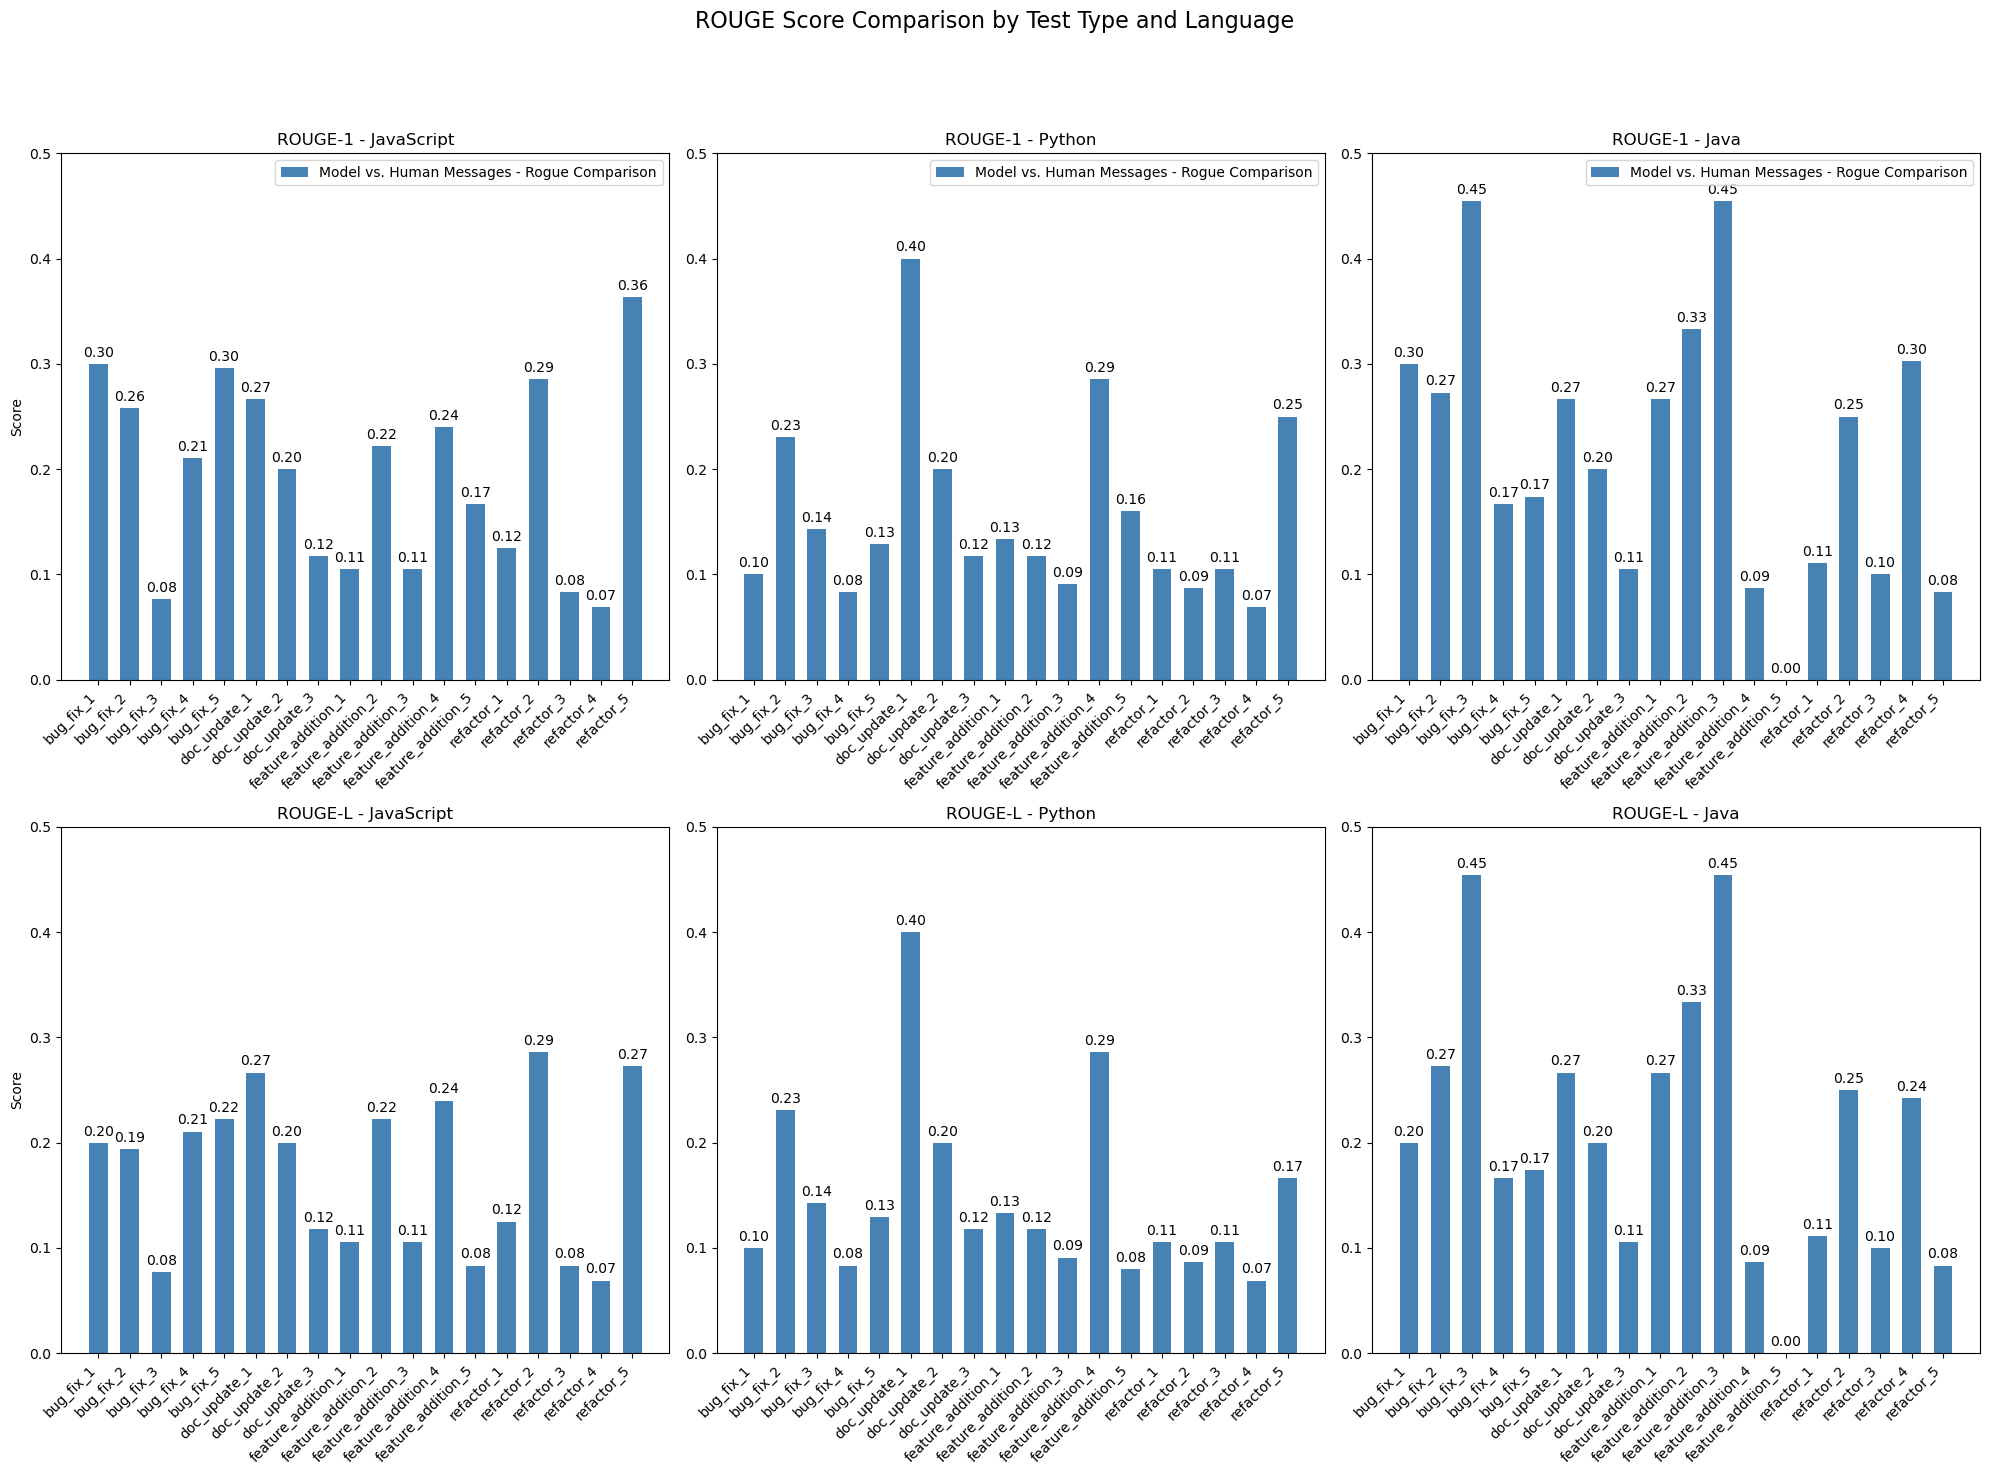

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define your test sets
datasets = [javascript_tests, python_tests, java_tests]
languages = ['JavaScript', 'Python', 'Java']
rouge_tests = ['ROUGE-1', 'ROUGE-L']  # Removed ROUGE-2

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for col, df in enumerate(datasets):
    for row, test in enumerate(rouge_tests):
        ax = axs[row, col]
        
        x = np.arange(len(df["test_name"]))
        width = 0.6  # Slightly wider bars since we're only using one set

        bars = ax.bar(x, df[f"concise msg {test}"], width, label='Model vs. Human Messages - Rogue Comparison', color='steelblue')
        
        ax.set_title(f'{test} - {languages[col]}')
        ax.set_xticks(x)
        ax.set_xticklabels(df["test_name"], rotation=45, ha="right")
        ax.set_ylim(0, .5)  
        if col == 0:
            ax.set_ylabel("Score")
        if row == 0:
            ax.legend(loc='upper right')

        def add_labels(bars):
            for bar in bars:
                height = bar.get_height()
                ax.annotate(f'{height:.2f}',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')
        
        add_labels(bars)

plt.suptitle("ROUGE Score Comparison by Test Type and Language", fontsize=16, y=1.05)
plt.savefig("ROUGE Score Comparison by Test Type and Language")
plt.tight_layout()
plt.show()


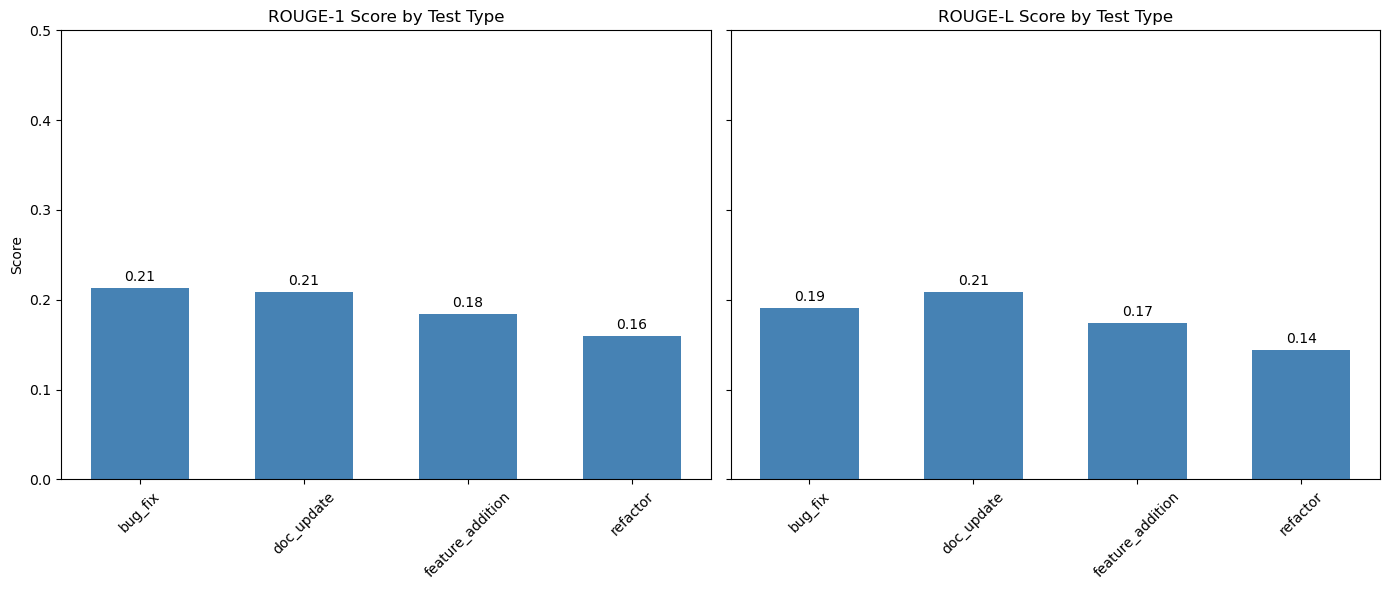

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Group by test_type and average the numeric columns
grouped = df.groupby('test_type').mean(numeric_only=True)

# Only include ROUGE-1 and ROUGE-L
rouge_metrics = ['ROUGE-1', 'ROUGE-L']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

test_types = grouped.index.tolist()
x = np.arange(len(test_types))
width = 0.6  # Wider bar for single value

for i, metric in enumerate(rouge_metrics):
    ax = axes[i]
    
    concise_col = f'concise msg {metric}'
    concise_vals = grouped[concise_col]
    
    bars = ax.bar(x, concise_vals, width, label='Model vs. Human Messages - Rogue Comparison', color='steelblue')
    
    ax.set_title(f'{metric} Score by Test Type')
    ax.set_xticks(x)
    ax.set_xticklabels(test_types, rotation=45)
    ax.set_ylabel('Score' if i == 0 else '')
    ax.set_ylim(0, .5)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig('rouge-grouped-test_type.png')
plt.show()


In [33]:

# # Group by language + test_type and take mean
# grouped = df.groupby(['test_language', 'test_type']).mean(numeric_only=True).reset_index()

# # Get unique languages and test types
# languages = grouped['test_language'].unique()
# test_types = grouped['test_type'].unique()
# x = np.arange(len(test_types))  # Position on x-axis
# width = 0.35

# # ROUGE metrics
# rouge_metrics = ['ROUGE-1', 'ROUGE-L']

# # Set up subplots: 1 row per language, 1 column per ROUGE metric
# fig, axes = plt.subplots(nrows=len(languages), ncols=3, figsize=(18, 6 * len(languages)), sharey='col')

# for row_idx, language in enumerate(languages):
#     lang_df = grouped[grouped['test_language'] == language]
    
#     for col_idx, metric in enumerate(rouge_metrics):
#         ax = axes[row_idx][col_idx] if len(languages) > 1 else axes[col_idx]
        
#         concise_vals = lang_df[f'concise msg {metric}']
#         extended_vals = lang_df[f'extended msg {metric}']

#         bars1 = ax.bar(x - width/2, concise_vals, width, label='Concise Message')
#         bars2 = ax.bar(x + width/2, extended_vals, width, label='Extended Message')

#         ax.set_title(f'{metric} Score by Test Type - {language}')
#         ax.set_xticks(x)
#         ax.set_xticklabels(test_types, rotation=45)
#         ax.set_ylabel('Score' if col_idx == 0 else '')
#         ax.legend()

#         # Add bar labels
#         def add_labels(bars):
#             for bar in bars:
#                 height = bar.get_height()
#                 ax.annotate(f'{height:.2f}',
#                             xy=(bar.get_x() + bar.get_width() / 2, height),
#                             xytext=(0, 3),
#                             textcoords="offset points",
#                             ha='center', va='bottom')

#         add_labels(bars1)
#         add_labels(bars2)

# plt.tight_layout()
# plt.savefig('rouge-grouped-test_type.png')
# plt.show()

In [40]:
df

,test_name,test_language,concise msg ROUGE-1,concise msg ROUGE-L,extended msg ROUGE-1,extended msg ROUGE-L,test_type
0,bug_fix_1,java,0.300000,0.200000,0.212766,0.212766,bug_fix
1,bug_fix_2,java,0.272727,0.272727,0.133333,0.133333,bug_fix
2,bug_fix_3,java,0.454545,0.454545,0.322581,0.258065,bug_fix
3,bug_fix_4,java,0.166667,0.166667,0.260870,0.260870,bug_fix
4,bug_fix_5,java,0.173913,0.173913,0.111111,0.111111,bug_fix
5,doc_update_1,java,0.266667,0.266667,0.133333,0.133333,doc_update
6,doc_update_2,java,0.200000,0.200000,0.444444,0.222222,doc_update
7,doc_update_3,java,0.105263,0.105263,0.051282,0.051282,doc_update
8,feature_addition_1,java,0.266667,0.266667,0.121212,0.121212,feature_addition
9,feature_addition_2,java,0.333333,0.333333,0.177778,0.177778,feature_addition


['java' 'javascript' 'python']
java
javascript
python


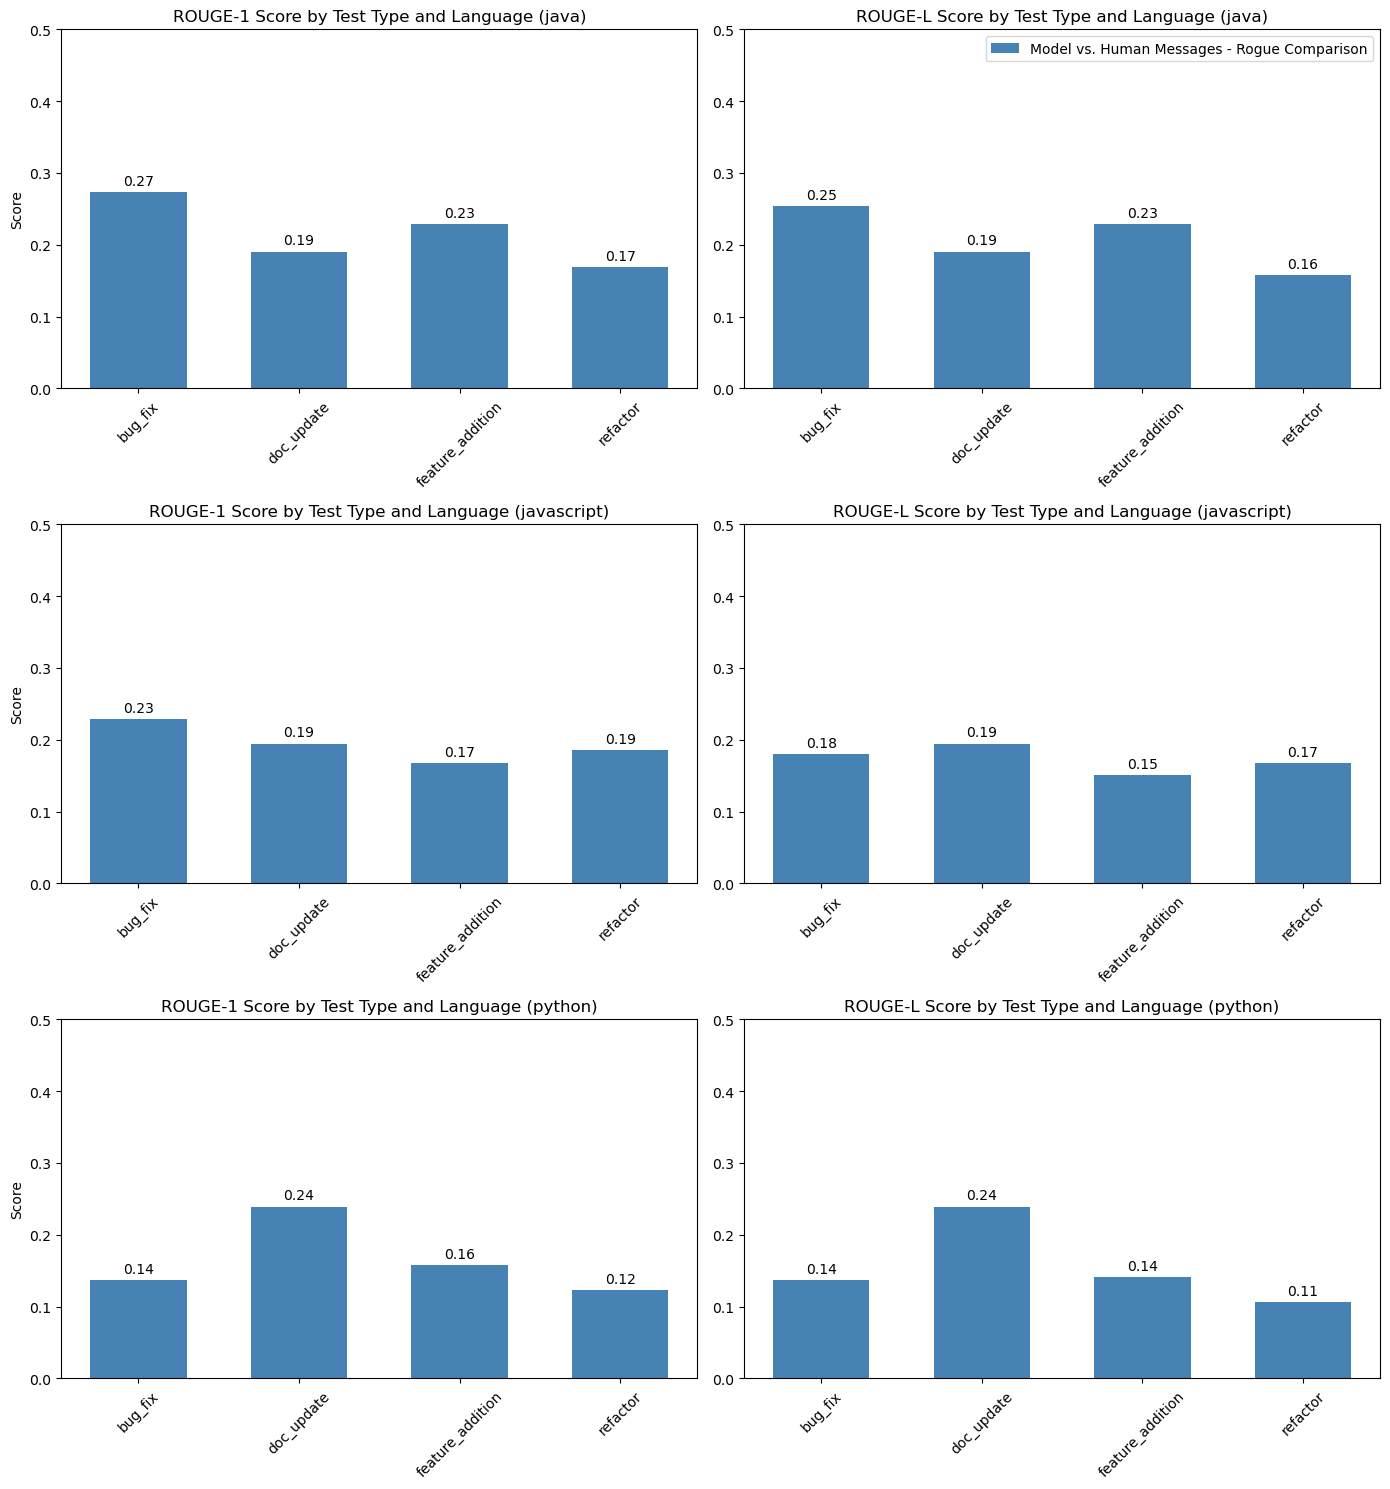

In [69]:
import matplotlib.pyplot as plt
import numpy as np

#ONE OF THE ABOVE PLOTS ARE REWRITING df SO NEED TO RERUN ALL df IMPORTS/PROCESSING BEFORE RUNNING THIS...or just fig out where it's being overwrittenn

# Group by language + test_type and take mean
grouped = df.groupby(['test_language', 'test_type']).mean(numeric_only=True).reset_index()

# Get unique languages and test types
languages = grouped['test_language'].unique()
print(languages)
test_types = grouped['test_type'].unique()
x = np.arange(len(test_types))  # Position on x-axis
width = 0.6  # Wider bar since only one bar per group

rouge_metrics = ['ROUGE-1', 'ROUGE-L']

# Set up subplots: 1 row per language, 1 column per ROUGE metric
fig, axes = plt.subplots(nrows=len(languages), ncols=2, figsize=(14, 5 * len(languages)), sharey='col')

for row_idx, language in enumerate(languages):
    print(language)
    lang_df = grouped[grouped['test_language'] == language]
    
    for col_idx, metric in enumerate(rouge_metrics):
        ax = axes[row_idx][col_idx] if len(languages) > 1 else axes[col_idx]

        concise_vals = lang_df[f'concise msg {metric}']
        
        bars = ax.bar(x, concise_vals, width, label='Model vs. Human Messages - Rogue Comparison', color='steelblue')

        ax.set_title(f'{metric} Score by Test Type and Language ({language})')
        ax.set_xticks(x)
        ax.set_xticklabels(test_types, rotation=45)
        ax.set_ylabel('Score' if col_idx == 0 else '')
        ax.set_ylim(0, .5)
        if row_idx == 0 and col_idx == 1:
            ax.legend()

        # Add bar labels
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout()
plt.savefig('rouge-grouped-test_type_&_test_language.png')
plt.show()
